In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# Loading data from the JSON file
with open('portfolio.json', 'r') as f:
    data = json.load(f)

In [ ]:
# Converting the list of records to a DataFrame

holdings = pd.DataFrame(data)

In [ ]:
# Calculating the total portfolio value

total_value = holdings['value_usd'].sum()

In [ ]:
# Sorting by value_usd descending and selecting the top 5 to avoid cluttering

holdings_sorted = holdings.sort_values('value_usd', ascending=False)
top_10 = holdings_sorted.head(5)

In [ ]:
# Grouping the rest as "Other"

n = 5  # Number of top rows to be selected
top_n = holdings_sorted[['symbol', 'value_usd']].iloc[:n]  # Selected top n rows
other_value = holdings_sorted['value_usd'].iloc[n:].sum()  # Sum of remaining rows
other_row = pd.DataFrame({'symbol': ['Other'], 'value_usd': [other_value]})
chart_data = pd.concat([top_n, other_row], ignore_index=True)


In [ ]:
# Validating chart_data for NAN values and types(Debugged)
print("chart_data:\n", chart_data)  # Debugging: Checked the DataFrame
print("Any NaN in value_usd:", chart_data['value_usd'].isna().any())  # Checked for NaN
print("value_usd type:", chart_data['value_usd'].dtype)  # Checked data type

chart_data:
    symbol     value_usd
0  AiMeme  8.669824e+14
1   ERBAI  2.029522e+13
2   MONEY  1.043810e+13
3    USSR  8.396683e+12
4  ADCBOT  6.780834e+12
5   Other  2.474151e+13
Any NaN in value_usd: False
value_usd type: float64


In [ ]:
# Calculating total value
total_value = chart_data['value_usd'].sum()

Pie chart saved as 'portfolio_pie_chart.png'


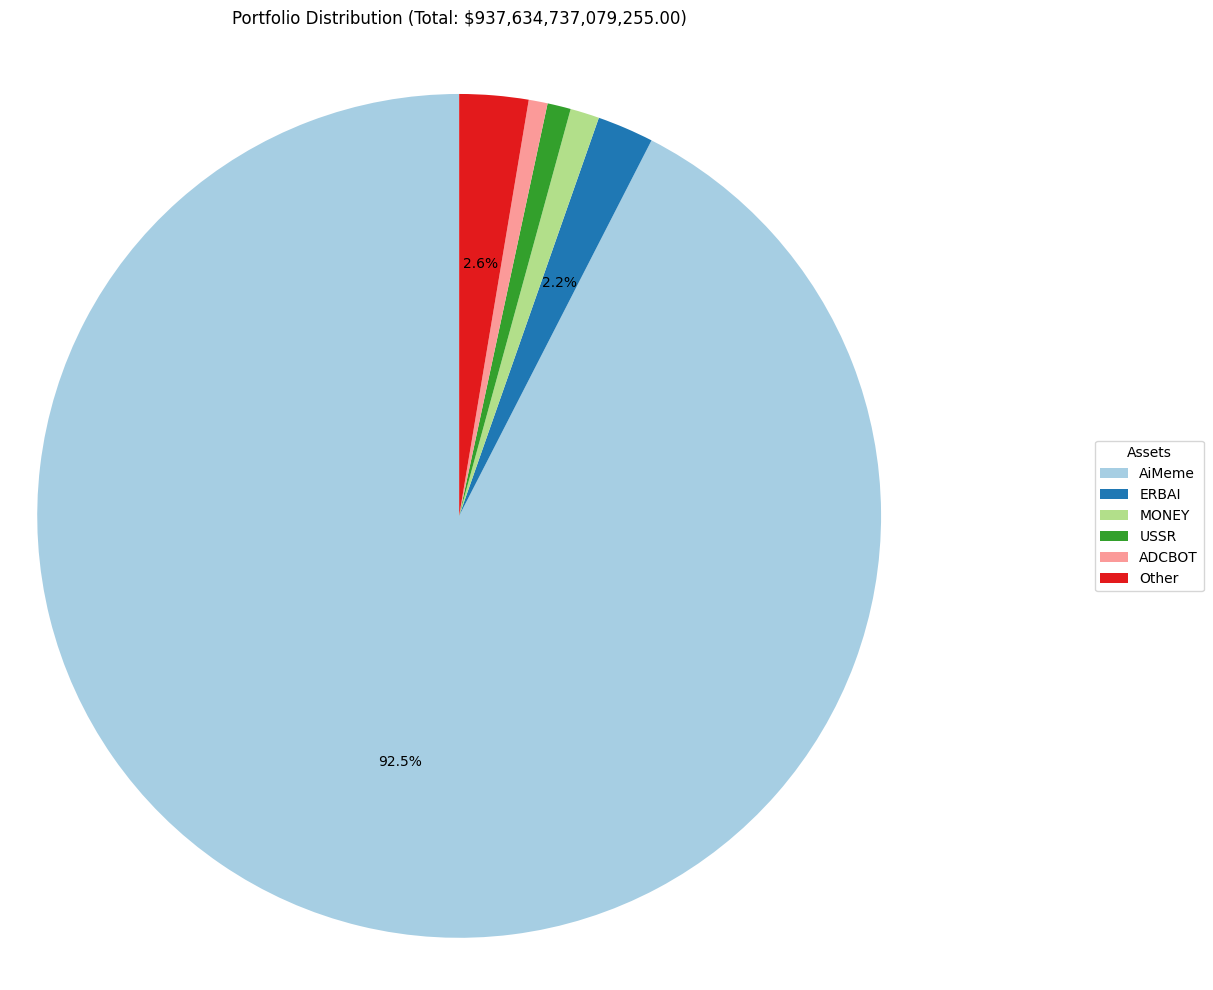

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(12, 10))  # Larger figure
colors = plt.cm.Paired(range(len(chart_data)))  # Distinct colors
wedges, texts, autotexts = plt.pie(
    chart_data['value_usd'],
    labels=None,  # No direct labels
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',  # Show % for slices > 2%
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.legend(
    wedges, chart_data['symbol'], 
    title="Assets", 
    loc="center left", 
    bbox_to_anchor=(1.2, 0, 0.5, 1),  # Moved legend further right
    fontsize=10
)

plt.title(f'Portfolio Distribution (Total: ${total_value:,.2f})', pad=20)
plt.axis('equal')  # Ensure circular pie chart

# Adjusting subplot to prevent compression
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)  # Adjusted margins
plt.tight_layout()

# Saving the figure before displaying

plt.savefig('portfolio_pie_chart.png', bbox_inches='tight', dpi=300)
print("Pie chart saved as 'portfolio_pie_chart.png'")

# Displaying the plot
plt.show()